In [1]:
#!/usr/bin/env python3

import numpy as np
import pandas as pd
import random
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
#import scikit-learn


In [2]:
rawdata = pd.read_csv("../data/partynyc/party_in_nyc.csv")
rawdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225414 entries, 0 to 225413
Data columns (total 8 columns):
Created Date     225414 non-null object
Closed Date      224619 non-null object
Location Type    225414 non-null object
Incident Zip     224424 non-null float64
City             224424 non-null object
Borough          225414 non-null object
Latitude         223946 non-null float64
Longitude        223946 non-null float64
dtypes: float64(3), object(5)
memory usage: 13.8+ MB


In [3]:
rawdata.head()

,Created Date,Closed Date,Location Type,Incident Zip,City,Borough,Latitude,Longitude
0,2015-12-31 00:01:15,2015-12-31 03:48:04,Store/Commercial,10034.0,NEW YORK,MANHATTAN,40.866183,-73.918930
1,2015-12-31 00:02:48,2015-12-31 04:36:13,Store/Commercial,10040.0,NEW YORK,MANHATTAN,40.859324,-73.931237
2,2015-12-31 00:03:25,2015-12-31 00:40:15,Residential Building/House,10026.0,NEW YORK,MANHATTAN,40.799415,-73.953371
3,2015-12-31 00:03:26,2015-12-31 01:53:38,Residential Building/House,11231.0,BROOKLYN,BROOKLYN,40.678285,-73.994668
4,2015-12-31 00:05:10,2015-12-31 03:49:10,Residential Building/House,10033.0,NEW YORK,MANHATTAN,40.850304,-73.938516


In [4]:
bar_loc = pd.read_csv("../data/partynyc/bar_locations.csv")
bar_loc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2440 entries, 0 to 2439
Data columns (total 7 columns):
Location Type    2440 non-null object
Incident Zip     2440 non-null float64
City             2440 non-null object
Borough          2440 non-null object
Latitude         2440 non-null float64
Longitude        2440 non-null float64
num_calls        2440 non-null int64
dtypes: float64(3), int64(1), object(3)
memory usage: 133.5+ KB


In [5]:
bar_loc.head(20)

,Location Type,Incident Zip,City,Borough,Latitude,Longitude,num_calls
0,Club/Bar/Restaurant,10308.0,STATEN ISLAND,STATEN ISLAND,40.544096,-74.141155,40
1,Club/Bar/Restaurant,10012.0,NEW YORK,MANHATTAN,40.729793,-73.998842,18
2,Club/Bar/Restaurant,10308.0,STATEN ISLAND,STATEN ISLAND,40.544209,-74.141040,21
3,Club/Bar/Restaurant,10034.0,NEW YORK,MANHATTAN,40.866376,-73.928258,160
4,Club/Bar/Restaurant,11220.0,BROOKLYN,BROOKLYN,40.635207,-74.020285,17
5,Club/Bar/Restaurant,10029.0,NEW YORK,MANHATTAN,40.791861,-73.945392,211
6,Club/Bar/Restaurant,10002.0,NEW YORK,MANHATTAN,40.718795,-73.989012,41
7,Club/Bar/Restaurant,10034.0,NEW YORK,MANHATTAN,40.869549,-73.916348,271
8,Club/Bar/Restaurant,11373.0,ELMHURST,QUEENS,40.739249,-73.884457,15
9,Club/Bar/Restaurant,10013.0,NEW YORK,MANHATTAN,40.722789,-74.004596,43


In [6]:
def split(data,train_ratio=0.7):
    n = len(data)
    index_list = np.random.permutation(n)
    train_size = int(train_ratio*n)
    test_indices = index_list[:train_size]
    train_indices = index_list[train_size:]
    return(data.iloc[test_indices],data.iloc[train_indices])

In [7]:
test,train = split(rawdata,0.7)

In [8]:
rawdata["Closed Date"] = pd.to_datetime(rawdata["Closed Date"])
rawdata["Created Date"] = pd.to_datetime(rawdata["Created Date"])

In [9]:
rawdata["Ticket Length"] = rawdata["Closed Date"] - rawdata["Created Date"]

In [10]:
rawdata["Ticket Length"].min()

Timedelta('-42440 days +01:03:51')

In [11]:
rawdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225414 entries, 0 to 225413
Data columns (total 9 columns):
Created Date     225414 non-null datetime64[ns]
Closed Date      224619 non-null datetime64[ns]
Location Type    225414 non-null object
Incident Zip     224424 non-null float64
City             224424 non-null object
Borough          225414 non-null object
Latitude         223946 non-null float64
Longitude        223946 non-null float64
Ticket Length    224619 non-null timedelta64[ns]
dtypes: datetime64[ns](2), float64(3), object(3), timedelta64[ns](1)
memory usage: 15.5+ MB


In [ ]:
#rawdata[rawdata["Ticket Length"] == rawdata["Ticket Length"].min()]

In [12]:
rawdata = rawdata.dropna(how='any')

In [13]:
rawdata["Ticket Length"].max()

Timedelta('34 days 19:42:33')

In [14]:
rawdata["Ticket Length"].min()

Timedelta('0 days 00:02:24')

In [ ]:
#rawdata["Ticket Length"] = pd.to_datetime(rawdata["Ticket Length"])

In [15]:
rawdata["Ticket Length Num"] = [i.total_seconds() for i in rawdata["Ticket Length"]]

In [16]:
rawdata["Ticket Length Scaled"] = rawdata["Ticket Length Num"]/rawdata["Ticket Length Num"].max()

In [17]:
rawdata["Ticket Length Color"] = [np.sqrt(x)*100 for x in rawdata["Ticket Length Scaled"]]

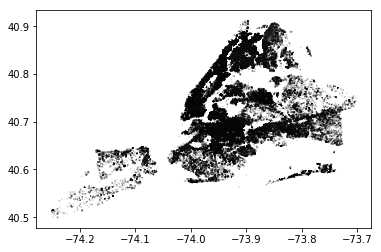

In [19]:
plt.scatter(rawdata["Longitude"],rawdata["Latitude"],c=rawdata["Ticket Length Color"],s=0.01,cmap="gray")
plt.show()

/usr/local/lib/python3.6/site-packages/ggplot/utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
/usr/local/lib/python3.6/site-packages/ggplot/stats/smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp
/usr/local/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


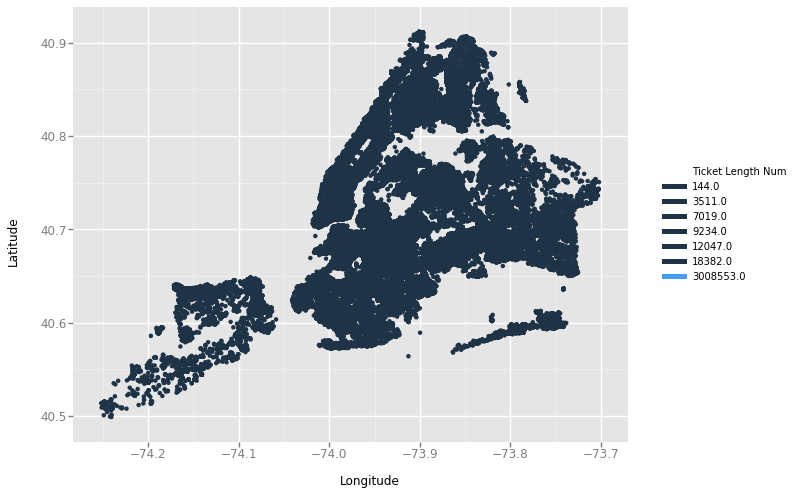

<ggplot: (283311834)>

In [20]:
from ggplot import *

ggplot(aes(x="Longitude",y="Latitude",color="Ticket Length Num"),data=rawdata) + geom_point()

In [ ]:
# proposed final data format
# gridify the dataset

In [21]:
print(len(pd.Series([round(x,5) for x in rawdata["Latitude"]]).unique()))
print(len(pd.Series([round(x,5) for x in rawdata["Longitude"]]).unique()))

26211
24423


In [22]:
rawdata["Lat Round"] = pd.Series([round(x,5) for x in rawdata["Latitude"]])
rawdata["Long Round"] = pd.Series([round(x,5) for x in rawdata["Longitude"]])

In [26]:
print(len(pd.Series([round(x,4) for x in rawdata["Lat Round"]]).unique()))
print(len(pd.Series([round(x,4) for x in rawdata["Long Round"]]).unique()))

3651
4210


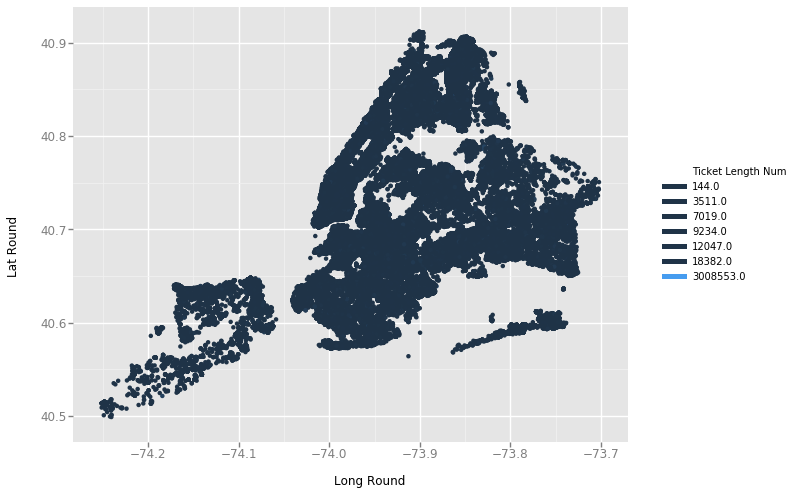

<ggplot: (293145415)>

In [23]:
ggplot(aes(x="Long Round",y="Lat Round",color="Ticket Length Num"),data=rawdata) + geom_point()

In [28]:
print("Earliest incident: ",rawdata["Created Date"].min())
print("Latest incident: ",rawdata["Created Date"].max())

Earliest incident:  2015-12-31 00:01:15
Latest incident:  2016-12-31 23:58:52


In [49]:
step = rawdata["Created Date"].max() - rawdata["Created Date"].min()
print(step/pd.Timedelta("1 hour"))

8807.960277777778


In [91]:
# turn data into consequtive frames, hour by hour (or day by day)

def prep_time(data):
    datelist = []
    startdate = data["Created Date"].min()
    startdate -= pd.Timedelta(minutes=startdate.minute)
    startdate -= pd.Timedelta(seconds=startdate.second)
    #datalist.append(startdate)
    for hour in range(0,round((data["Closed Date"].max()-startdate)/pd.Timedelta("1 hour"))):
        datelist.append((startdate + pd.Timedelta(hours=hour)))
    return(datelist)

def framer(data,datelist):
    new_data = {}
    for date in datelist:
        temp = pd.DataFrame()
        #temp = data.iloc[(data["Created Date"].hour >= date.hour & data["Created Date"].month <= date.month & data["Closed Date"].hour <= date.hour & data["Closed Date"].month <= date.month),["Latitude","Longitude"]]
        #temp = [True if a == b else False for a,b in zip([True if x.month >= date.month & x.hour >= date.month else False for x in data["Created Date"]],[True if x.month <= date.month & x.hour <= date.month else False for x in data["Closed Date"]])]
        #print(len(temp)==len(data["Closed Date"]))
        temp = data.iloc[[True if a == b else False for a,b in zip([True if x.month >= date.month & x.hour >= date.hour else False for x in data["Created Date"]],[True if x.month <= date.month & x.hour <= date.hour else False for x in data["Closed Date"]])], [True if x in ["Latitude","Longitude"] else False for x in data]]
        new_data[str(date)] = temp
    return(new_data)




In [99]:
from multiprocessing.dummy import Pool as ThreadPool

In [102]:
def getFrame(data,date):
    return({str(date):(data.iloc[[True if a == b else False for a,b in zip([True if x.month >= date.month & x.hour >= date.hour else False for x in data["Created Date"]],[True if x.month <= date.month & x.hour <= date.hour else False for x in data["Closed Date"]])],:])})

In [67]:
datelist = prep_time(rawdata)

In [103]:
mypool = ThreadPool(8)

In [ ]:
frame_list = mypool.map(lambda x: (getFrame(rawdata,x)),datelist)

In [98]:
len(datelist)

8836

In [65]:
temporary = rawdata["Created Date"][200]
print("Starting: ", temporary)
temporary -= pd.Timedelta(minutes=temporary.minute)
print("Ending: ",temporary)

Starting:  2015-12-31 13:49:14
Ending:  2015-12-31 13:00:14


In [92]:
temporary = framer(rawdata,[datelist[0]])

In [96]:
len(temporary['2015-12-31 00:00:00'])

34867

In [95]:
frame_data = framer(rawdata,datelist)

KeyboardInterrupt: 

In [97]:
rawdata.shape

(223861, 14)